**Цель проекта - исследовать данные и подготовить к дальнейшему моделированию.**

**Задача - создать модель, которая может предсказывать оценку ученика;** 
          **или, другими словами, отобрать параметры, которые могут влить на оценку ученика.**

### Этап 1.
**Первичная обработка и заполнение пропусков**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# Переименовали колонку с запятой
stud_math.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [4]:
# Видим: количество строк 395; 13 колонок числовых данных; 17 колонок категоиальных данных.
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                395 non-null object
sex                   395 non-null object
age                   395 non-null int64
address               378 non-null object
famsize               368 non-null object
Pstatus               350 non-null object
Medu                  392 non-null float64
Fedu                  371 non-null float64
Mjob                  376 non-null object
Fjob                  359 non-null object
reason                378 non-null object
guardian              364 non-null object
traveltime            367 non-null float64
studytime             388 non-null float64
failures              373 non-null float64
schoolsup             386 non-null object
famsup                356 non-null object
paid                  355 non-null object
activities            381 non-null object
nursery               379 non-null object
studytime_granular    388 non-null float64
higher  

In [5]:
# Посчитали количество и процент пропусков в колонках
for col in stud_math.columns:
    nbr_missing = stud_math[col].isnull().sum()
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {} ; {}%'.format(col, nbr_missing, round(pct_missing*100)))

school - 0 ; 0.0%
sex - 0 ; 0.0%
age - 0 ; 0.0%
address - 17 ; 4.0%
famsize - 27 ; 7.0%
Pstatus - 45 ; 11.0%
Medu - 3 ; 1.0%
Fedu - 24 ; 6.0%
Mjob - 19 ; 5.0%
Fjob - 36 ; 9.0%
reason - 17 ; 4.0%
guardian - 31 ; 8.0%
traveltime - 28 ; 7.0%
studytime - 7 ; 2.0%
failures - 22 ; 6.0%
schoolsup - 9 ; 2.0%
famsup - 39 ; 10.0%
paid - 40 ; 10.0%
activities - 14 ; 4.0%
nursery - 16 ; 4.0%
studytime_granular - 7 ; 2.0%
higher - 20 ; 5.0%
internet - 34 ; 9.0%
romantic - 31 ; 8.0%
famrel - 27 ; 7.0%
freetime - 11 ; 3.0%
goout - 8 ; 2.0%
health - 15 ; 4.0%
absences - 12 ; 3.0%
score - 6 ; 2.0%


In [6]:
# Еще немного анализа
print(
    f'Датасет содержит {stud_math.isnull().any().sum()} колонок с пустыми значениями.')

Датасет содержит 27 колонок с пустыми значениями.


In [7]:
# Исследуем объектные данные
stud_math.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [8]:
# Исследуем числовые данные
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Пропуски в категориальных колонках заполним самым частым значением

In [9]:
for col in stud_math:
    if stud_math[col].dtype == 'object':
        stud_math.Pstatus.fillna(stud_math[col].mode()[0], inplace=True)

Пропуски в колонках 'score', 'absences' заполним медианным значением

In [10]:
stud_math.score.fillna(stud_math.score.mode()[0], inplace=True)
stud_math.absences.fillna(stud_math.absences.mode()[0], inplace=True)

Оставшиеся пропуски заполним также самым частым значением

In [11]:
for col in stud_math:
    stud_math[col].fillna(stud_math[col].mode()[0], inplace=True)

### Этап 2.
**Изучаем распределение числовых признаков. Устраняем выбросы**

Ищем выбросы в главной колонке "score".

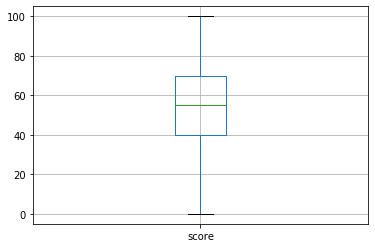

In [12]:
stud_math.boxplot(column=['score'])

In [13]:
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print("Границы выбросов absences: [{f}, {l}].".format(
    f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов absences: [-5.0, 115.0].


нет выбросов в колонке "score";
максимальные и минимальные значения - в пределах границ выбросов.

Посчитаем количество значений в остальных числовых колонках.

In [14]:
# Числовые колонки
for col in stud_math:
    if stud_math[col].dtype != 'object':
        display(stud_math[col].value_counts())

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

 4.0    209
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

0.0      123
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

50.0     60
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Подсчитываем количество разных значений в колонках:
age - значения лежат в пределах исследования;
Medu - в пределах исследования; Делаю допущение, что признак можно считать категорийным. Так как содержит ограниченный набор значений.
Fedu - есть выброс; Также признак можно считать категорийным.

In [15]:
stud_math['Fedu'].value_counts()

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [16]:
# удаляем выброс Fedu
stud_math = stud_math.loc[stud_math.Fedu <= 4.0]

Далее
Подсчитываем количество разных значений:
traveltime - в пределах исследования; Также признак можно считать категорийным.
studytime - в пределах исследования; Также признак можно считать категорийным.
failures - в пределах исследования; Также признак можно считать категорийным.
studytime_granular - столбец не описан во вводной части, но оставлю его. Можно считать категорийным.
famrel - есть выброс; Также признак можно считать категорийным.

In [17]:
stud_math['famrel'].value_counts()

 4.0    209
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [18]:
# удаляем выброс famrel
stud_math = stud_math.loc[stud_math.famrel >= 1.0]

Далее
Подсчитываем количество разных значений:
freetime - в пределах исследования; Также признак можно считать категорийным.
goout - в пределах исследования; Также признак можно считать категорийным.
health - в пределах исследования; Также признак можно считать категорийным.
absences - есть выброс; 

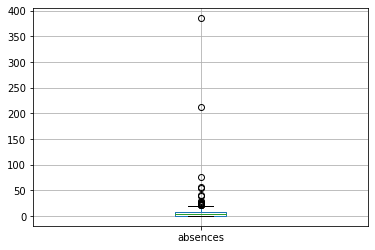

In [19]:
stud_math.boxplot(column=['absences'])

In [20]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print("Границы выбросов absences: [{f}, {l}].".format(
    f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов absences: [-12.0, 20.0].


In [21]:
# удаляем выброс absences
stud_math = stud_math.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Посчитаем количество значений в категорийных колонках.

In [22]:
# категорийные колонки
for col in stud_math:
    if stud_math[col].dtype == 'object':
        display(stud_math[col].value_counts())

GP    331
MS     45
Name: school, dtype: int64

F    193
M    183
Name: sex, dtype: int64

U    295
R     81
Name: address, dtype: int64

GT3    272
LE3    104
Name: famsize, dtype: int64

T     306
GP     38
A      32
Name: Pstatus, dtype: int64

other       144
services     89
at_home      57
teacher      54
health       32
Name: Mjob, dtype: int64

other       224
services     94
teacher      27
at_home      16
health       15
Name: Fjob, dtype: int64

course        152
reputation     97
home           94
other          33
Name: reason, dtype: int64

mother    267
father     84
other      25
Name: guardian, dtype: int64

no     328
yes     48
Name: schoolsup, dtype: int64

yes    243
no     133
Name: famsup, dtype: int64

no     232
yes    144
Name: paid, dtype: int64

yes    203
no     173
Name: activities, dtype: int64

yes    301
no      75
Name: nursery, dtype: int64

yes    358
no      18
Name: higher, dtype: int64

yes    321
no      55
Name: internet, dtype: int64

no     262
yes    114
Name: romantic, dtype: int64

В категорийных колонках странностей не обнаружено. Значения соответствуют описанию.

### Этап 3.
**Корреляционный анализ**

In [23]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.181623,-0.169810,0.095131,-0.008483,0.221297,0.008483,0.060337,0.043582,0.145308,-0.055122,0.144836,-0.162181
Medu,-0.181623,1.000000,0.592230,-0.174315,0.092265,-0.251608,-0.092265,-0.016949,0.044207,0.049682,-0.060891,0.072306,0.206645
Fedu,-0.169810,0.592230,1.000000,-0.132565,0.009131,-0.277640,-0.009131,-0.027580,-0.015852,0.039550,-0.005697,-0.034223,0.120427
traveltime,0.095131,-0.174315,-0.132565,1.000000,-0.092025,0.063948,0.092025,-0.029791,0.004231,0.050271,-0.044232,-0.023318,-0.057680
studytime,-0.008483,0.092265,0.009131,-0.092025,1.000000,-0.167298,-1.000000,0.020988,-0.132306,-0.040009,-0.068632,-0.065573,0.116237
failures,0.221297,-0.251608,-0.277640,0.063948,-0.167298,1.000000,0.167298,0.003821,0.089126,0.104564,0.079122,0.063594,-0.332017
studytime_granular,0.008483,-0.092265,-0.009131,0.092025,-1.000000,0.167298,1.000000,-0.020988,0.132306,0.040009,0.068632,0.065573,-0.116237
famrel,0.060337,-0.016949,-0.027580,-0.029791,0.020988,0.003821,-0.020988,1.000000,0.160327,0.066849,0.092280,-0.060075,0.058637
freetime,0.043582,0.044207,-0.015852,0.004231,-0.132306,0.089126,0.132306,0.160327,1.000000,0.274073,0.060808,0.090479,0.037410
goout,0.145308,0.049682,0.039550,0.050271,-0.040009,0.104564,0.040009,0.066849,0.274073,1.000000,-0.000426,0.097096,-0.111309


Колонок с высокой корреляцией не видно.

### Этап 4.
**Анализ номинативных переменных**

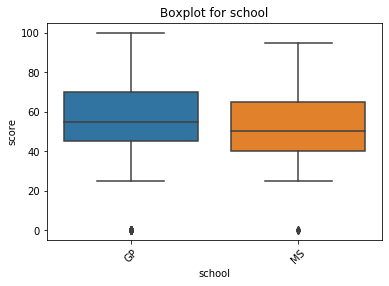

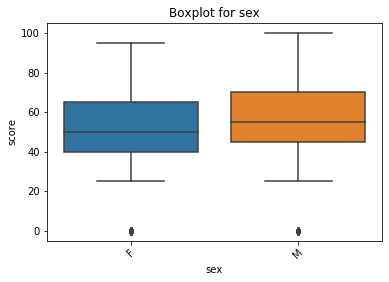

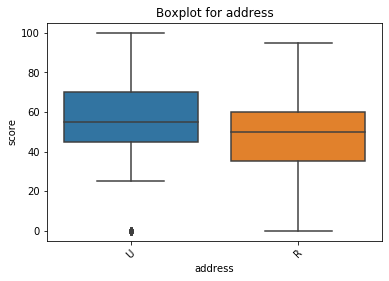

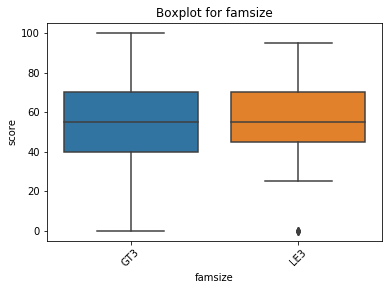

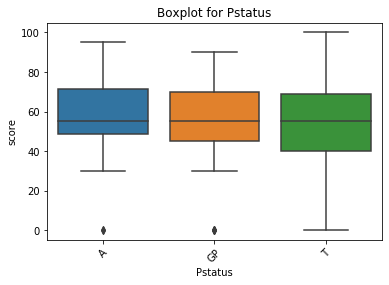

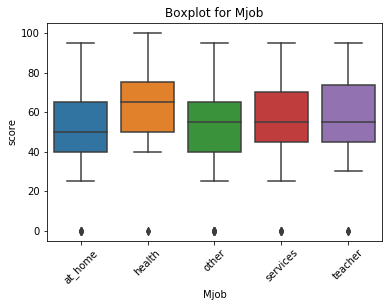

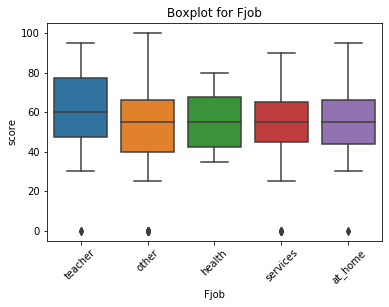

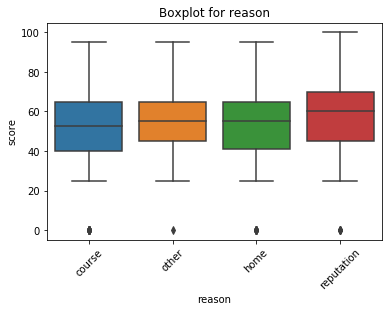

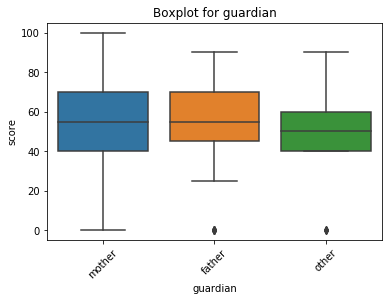

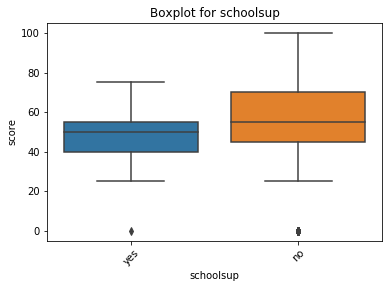

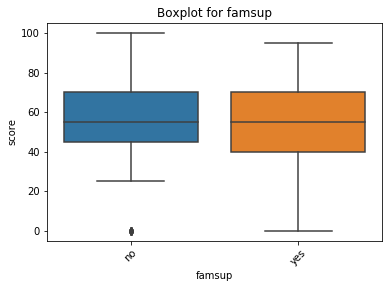

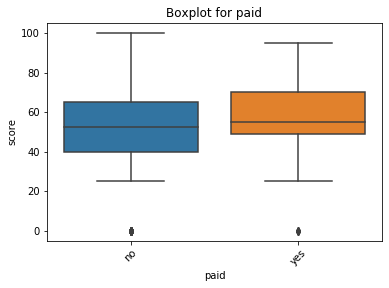

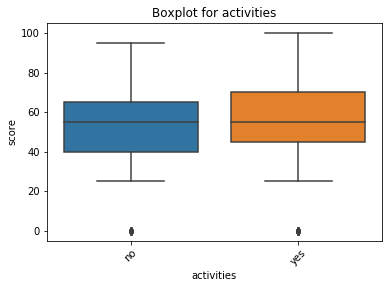

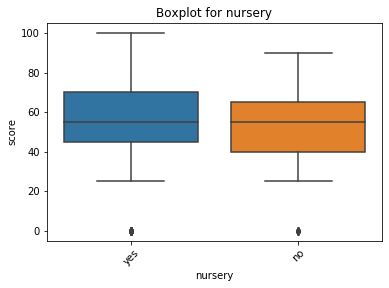

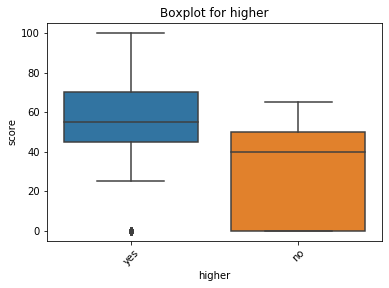

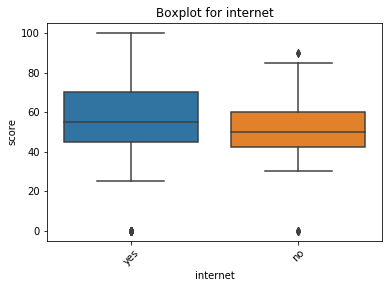

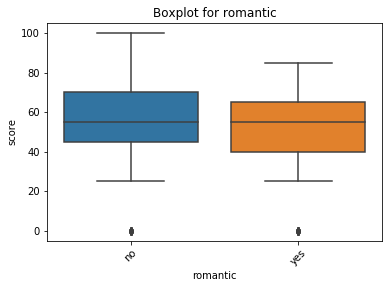

In [24]:
for col in stud_math:
    if stud_math[col].dtype == 'object':
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.boxplot(x=col, y='score',
                    data=stud_math.loc[stud_math.loc[:, col].isin(
                        stud_math.loc[:, col].value_counts().index[:20])],
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()

Делаю допущение, что все параметры влияют на оценку

Сделаем тест Стьюдента.

In [25]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Проследим, как влияют конкретные значения признаков, отобранным тестом.

Разделю датасет на две группы. С оценкой < 60 и >= 60 .
Это прообраз группы риска (ученики с низкой оценкой).

In [26]:
# Количество записей
stud_math[stud_math.score < 60.0].shape[0]

219

In [27]:
# Количество записей
stud_math[stud_math.score >= 60.0].shape[0]

157

In [28]:
stud_math[stud_math.score < 60.0].groupby(
    ['sex'])['score'].count().sort_values().head(10)

sex
M     95
F    124
Name: score, dtype: int64

In [29]:
stud_math[stud_math.score >= 60.0].groupby(
    ['sex'])['score'].count().sort_values().head(10)

sex
F    69
M    88
Name: score, dtype: int64

'sex' - Женщин в гуппе риска больше. Влияние слабое.

In [30]:
stud_math[stud_math.score < 60.0].groupby(
    ['address'])['score'].count().sort_values().head(10)

address
R     56
U    163
Name: score, dtype: int64

In [31]:
stud_math[stud_math.score >= 60.0].groupby(
    ['address'])['score'].count().sort_values().head(10)

address
R     25
U    132
Name: score, dtype: int64

'address' - Живущих за городом в группе риска в два раза больше.

In [32]:
stud_math[stud_math.score < 60.0].groupby(
    ['Mjob'])['score'].count().sort_values().head(10)

Mjob
health      12
teacher     31
at_home     39
services    49
other       88
Name: score, dtype: int64

In [33]:
stud_math[stud_math.score >= 60.0].groupby(
    ['Mjob'])['score'].count().sort_values().head(10)

Mjob
at_home     18
health      20
teacher     23
services    40
other       56
Name: score, dtype: int64

'Mjob' - Уберу столбец. Не вижу преобладающего влияния какого либо значения.

In [34]:
stud_math.drop(['Mjob'], axis='columns', inplace=True)

In [35]:
stud_math[stud_math.score < 60.0].groupby(
    ['paid'])['score'].count().sort_values().head(10)

paid
yes     82
no     137
Name: score, dtype: int64

In [36]:
stud_math[stud_math.score >= 60.0].groupby(
    ['paid'])['score'].count().sort_values().head(10)

paid
yes    62
no     95
Name: score, dtype: int64

'paid' - Отсутствие доп. занятий влияет на попадание в группу риска. Влияние слабое.

In [37]:
stud_math[stud_math.score < 60.0].groupby(
    ['romantic'])['score'].count().sort_values().head(10)

romantic
yes     68
no     151
Name: score, dtype: int64

In [38]:
stud_math[stud_math.score >= 60.0].groupby(
    ['romantic'])['score'].count().sort_values().head(10)

romantic
yes     46
no     111
Name: score, dtype: int64

'romantic' - Уберу колонку. Не вижу преобладающего влияния какого либо значения.

In [39]:
stud_math.drop(['romantic'], axis='columns', inplace=True)

Проведу такой же анализ для остальных категорийных и псевдокатегорийных колонок.

In [40]:
for col in stud_math:
    if col not in ['score', 'address', 'sex', 'Mjob', 'paid', 'higher', 'romantic', 'absences']:
        print(stud_math[stud_math.score < 60.0].groupby(
            [col])['score'].count().sort_values().head(7))
        print(stud_math[stud_math.score >= 60.0].groupby(
            [col])['score'].count().sort_values().head(7))

school
MS     30
GP    189
Name: score, dtype: int64
school
MS     15
GP    142
Name: score, dtype: int64
age
21     1
22     1
19    16
15    41
18    52
16    53
17    55
Name: score, dtype: int64
age
20     2
19     5
18    27
17    37
15    39
16    47
Name: score, dtype: int64
famsize
LE3     54
GT3    165
Name: score, dtype: int64
famsize
LE3     50
GT3    107
Name: score, dtype: int64
Pstatus
A      18
GP     21
T     180
Name: score, dtype: int64
Pstatus
A      14
GP     17
T     126
Name: score, dtype: int64
Medu
0.0     1
1.0    45
3.0    53
2.0    60
4.0    60
Name: score, dtype: int64
Medu
0.0     2
1.0    14
2.0    36
3.0    38
4.0    67
Name: score, dtype: int64
Fedu
0.0     1
4.0    38
1.0    55
3.0    55
2.0    70
Name: score, dtype: int64
Fedu
0.0     1
1.0    23
3.0    34
4.0    46
2.0    53
Name: score, dtype: int64
Fjob
at_home       9
health        9
teacher      12
services     57
other       132
Name: score, dtype: int64
Fjob
health       6
at_home      7
teacher

'school' - распределение пропорциональное. Убрать колонку.
'age' - С 16 до 18 лет - в гуппе риска.
'famsize'- распределение пропорциональное. Убрать колонку.
'Pstatus'- распределение пропорциональное. Убрать колонку.
'Fedu' и 'Medu' - низкое образование - в группе риска.
'Fjob'- Признак с высоким значением "прочее", не информативен. Убрать колонку.
'reason'- course и home - в гуппе риска.
'guardian'- распределение пропорциональное. Убрать колонку.
'traveltime'- Чем дальше от школы, тем больше вероятность попадания в гуппу риска. Влияние высокое.
'studytime'- Чем меньше времени на учебу, тем больше вероятность попадания в гуппу риска. Влияние высокое.
'failures'- большое количество неудач - в гуппе риска.
'schoolsup'-  доп. поддержка - в гуппе риска.
'famsup'- распределение пропорциональное. Убрать колонку.
'activities'- распределение пропорциональное. Убрать колонку.
'nursery'- распределение пропорциональное. Убрать колонку.
'studytime_granular'- -6 - в гуппе риска.
'internet'- распределение пропорциональное. Убрать колонку.
'famrel'- распределение пропорциональное. Убрать колонку.
'freetime'- Большое свободное время- в гуппе риска.
'goout'- Большое свободного времени с друзьями - в гуппе риска. 
'health'- Хорошее здоровье - в гуппе риска. 

In [41]:
stud_math.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'guardian', 'famsup', 'activities',
                'nursery', 'internet', 'famrel', 'health'], axis='columns', inplace=True)

Анализируем колонку 'absences' :

In [42]:
stud_math[stud_math.score >= 60.0]['absences'].sum()

650.0

In [43]:
stud_math[stud_math.score < 60.0]['absences'].sum()

1017.0

'absences'- Большие пропуски занятий - в гуппе риска. Влияние высокое.

Остались колонки:

In [44]:
stud_math.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'reason', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'paid', 'studytime_granular',
       'higher', 'freetime', 'goout', 'absences', 'score'],
      dtype='object')

### Выводы.

В результате EDA для анализа влияния условий жизни учащегося на успеваемость по математике были получены следующие выводы:

1.В данных присутствует мало пустых значений.
2.Выбросы найдены только в столбцах famrel и abcences, что позволяет сделать вывод о том, что данные достаточно чистые.
3.Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это - 'sex', 'age', 'address',  'Medu', 'Fedu', 'reason', 'traveltime','studytime', 'failures', 'schoolsup', 'paid', 'studytime_granular',
'higher', 'freetime', 'goout', 'absences', 'score'.

### Саморефлексия
1. Работой не довольна. Слабая.
2. Не совсем поняла применение графиков. Надо помедитировать
3. Очень интересная тема. Планирую перечитать материал и посмотреть доп. материалы.
4. Спасибо, что подождали.